In [1]:
import pandas as pd
import numpy as np
import warnings

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

# 1. Data Cleaning

In [1]:
import pandas as pd

# Load the Excel file into a Pandas DataFrame
try:
    # Replace the file path with your actual file path
    df = pd.read_excel("/content/Online Retail.xlsx")
    print("Excel file loaded successfully!")

    # Display the first few rows of the DataFrame
    print(df.head())
except FileNotFoundError:
    print("Error: The file 'Online Retail.xlsx' was not found at the specified path.")
except Exception as e:
    print(f"An error occurred: {e}")


Excel file loaded successfully!
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products bought: ", df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique())
print('Number of countries: ', df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Number of countries:  38


**Check for Null Values**

In [6]:
import numpy as np # Import the numpy library and alias it as np

np.sum(df.isnull()) # Now you can use np to access numpy functions

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [7]:
print("Percentage of customers missing: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Percentage of customers missing:  24.93 %


In [8]:
df['CustomerID_is_null'] = [1 if i == True else 0 for i in df.CustomerID.isnull()]

In [9]:
#Create a new dateframe of only orders with missing CustomerID values
df1 = df[df['CustomerID_is_null'] == 1]

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135080 entries, 622 to 541540
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           135080 non-null  object        
 1   StockCode           135080 non-null  object        
 2   Description         133626 non-null  object        
 3   Quantity            135080 non-null  int64         
 4   InvoiceDate         135080 non-null  datetime64[ns]
 5   UnitPrice           135080 non-null  float64       
 6   CustomerID          0 non-null       float64       
 7   Country             135080 non-null  object        
 8   CustomerID_is_null  135080 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 10.3+ MB


In [11]:
df1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1


In [12]:
print("Number of orders in df1:", df1['InvoiceNo'].nunique())
print("Avg. number of products per order in df1: ", round(df1['StockCode'].count() / df1['InvoiceNo'].nunique(),2) )
print("Avg. number of products per order in df: ",  round(df['StockCode'].count() / df['InvoiceNo'].nunique(),2) )

Number of orders in df1: 3710
Avg. number of products per order in df1:  36.41
Avg. number of products per order in df:  20.92


In [13]:
df['NewID'] = df['CustomerID']
df.loc[df['CustomerID_is_null'] == 1, ['NewID']] = df['InvoiceNo']

#drop CustomerID column since it isn't need anymore
#df = df.drop('CustomerID', 1)
df.head()

<ipython-input-13-736d9085d651>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[536414, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536544, 536

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           541909 non-null  object        
 1   StockCode           541909 non-null  object        
 2   Description         540455 non-null  object        
 3   Quantity            541909 non-null  int64         
 4   InvoiceDate         541909 non-null  datetime64[ns]
 5   UnitPrice           541909 non-null  float64       
 6   CustomerID          406829 non-null  float64       
 7   Country             541909 non-null  object        
 8   CustomerID_is_null  541909 non-null  int64         
 9   NewID               541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 41.3+ MB


In [16]:
#Remove all non digits from column NewID
df['NewID'] = df['NewID'].astype(str).str.replace('\D+', '', regex=True)

#Convert to integer
df['NewID'] = pd.to_numeric(df['NewID'], errors='coerce')

#Check if the 'C' character was removed in the NewID column
df[df['NewID']== 580605]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,1,580605


In [17]:
Num_CustomerID = df['CustomerID'].nunique()
Num_df1_InvoiceNo = df1['InvoiceNo'].nunique()
Num_NewID = df['NewID'].nunique()
print("Number of Customers:", df['CustomerID'].nunique())
print("Number of Orders in df1:", df1['InvoiceNo'].nunique())
print("Number of Customers + Number of Orders in df1:", Num_CustomerID + Num_df1_InvoiceNo)
print("Number of New ID's:", df['NewID'].nunique())

Number of Customers: 4372
Number of Orders in df1: 3710
Number of Customers + Number of Orders in df1: 8082
Number of New ID's: 8082


# 2. Exploratory Data Analysis

Now that our data set is clean, let's take a closer look at the numberic columns, specifically Quantity and UnitPrice.

In [18]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerID_is_null,NewID
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,0.249267,253869.471330
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,0.000000,123460.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,0.000000,143670.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,0.000000,162490.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,0.000000,182830.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,1.000000,581498.000000
std,218.081158,NaN,96.759853,1713.600303,0.432589,176036.804611


## Negative Values

As mentioned above, if the invoice number starts with the letter "C", it means it the order was cancelled.

In [19]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0,145270
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0,153110
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0,175480
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,175480
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,175480


In [20]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID


In [21]:
print("There were", len(cancelled_orders), "cancelled orders.")

#Calculate the percentage of cancellations by dividing the cancelled orders by the total orders
total_orders = df['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9288 cancelled orders.
Percentage of orders cancelled: 35.86% 


In [22]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,1,563186
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,1,563187


## Exploring the Orders

#### a. What's the average number of orders per customer?

In [23]:
#Find the unique number of InvoiceNo  per customer
groupby_customers = pd.DataFrame(df.groupby('NewID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
NewID,
123460,2
123470,7
123480,4
123490,1
123500,1


In [24]:
groupby_customers.describe()

,InvoiceNo
count,8082.000000
mean,3.204652
std,7.162265
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,248.000000


#### b. What's the average number of unqiue items per order and per customer?

In [25]:
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

,Number of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [26]:
groupby_invoice.describe()

,Number of Items per Order
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [27]:
groupby_ID = pd.DataFrame(df.groupby('NewID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
NewID,
123460,1
123470,103
123480,22
123490,73
123500,17


In [28]:
groupby_ID.describe()

,Number of Items per Customer
count,8082.000000
mean,49.759837
std,91.220932
min,1.000000
25%,1.000000
50%,17.000000
75%,58.000000
max,1794.000000


<ipython-input-30-794feb3def03>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
<ipython-input-30-794feb3def03>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1]

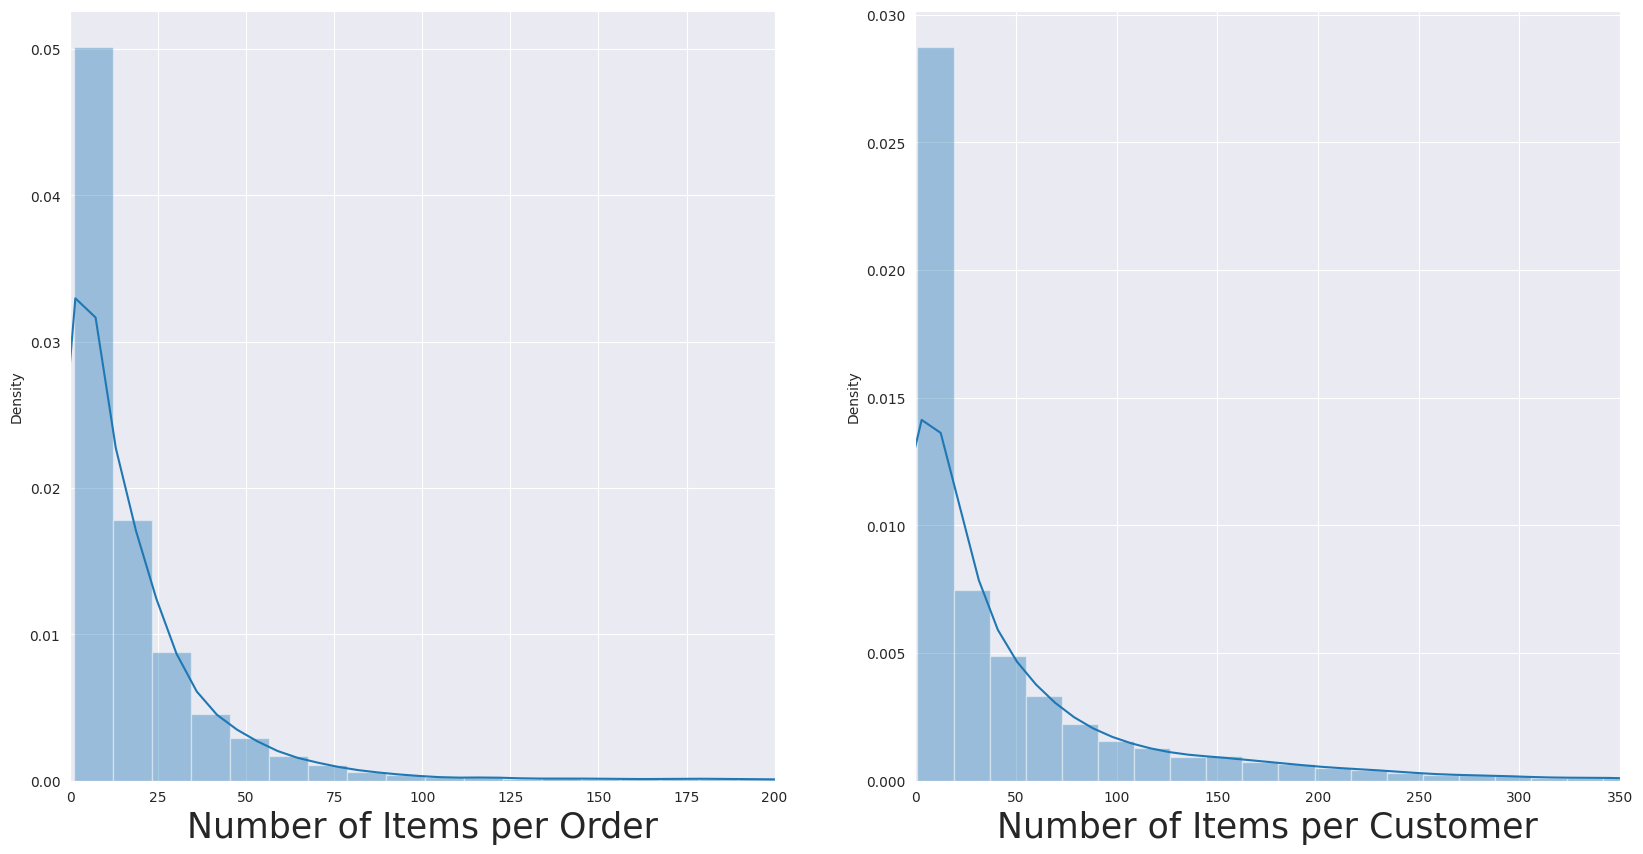

In [30]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Your existing code
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

groupby_invoice.describe()

groupby_ID = pd.DataFrame(df.groupby('NewID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

groupby_ID.describe()

#Visualize the distribution of both
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

## Customers by Country

In [31]:
df['Total_Cost'] = df['Quantity'] * df['UnitPrice']

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,178500,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,178500,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34


<ipython-input-33-76096bfc834f>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")


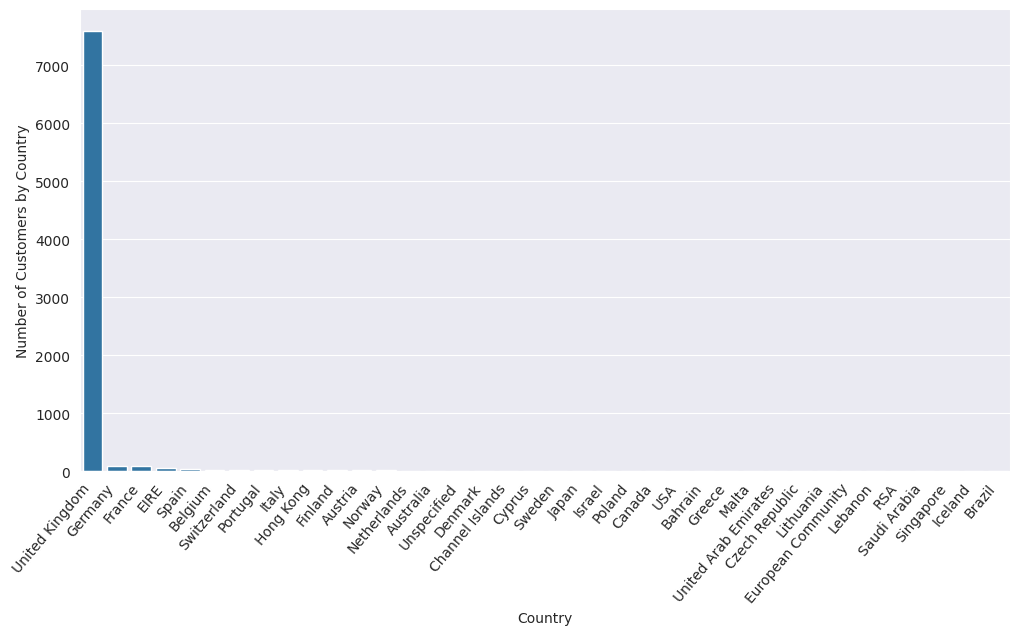

In [33]:
country_df = pd.DataFrame(df.groupby('Country')['NewID'].nunique())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index, y=country_df['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

<ipython-input-34-68643962fea6>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")


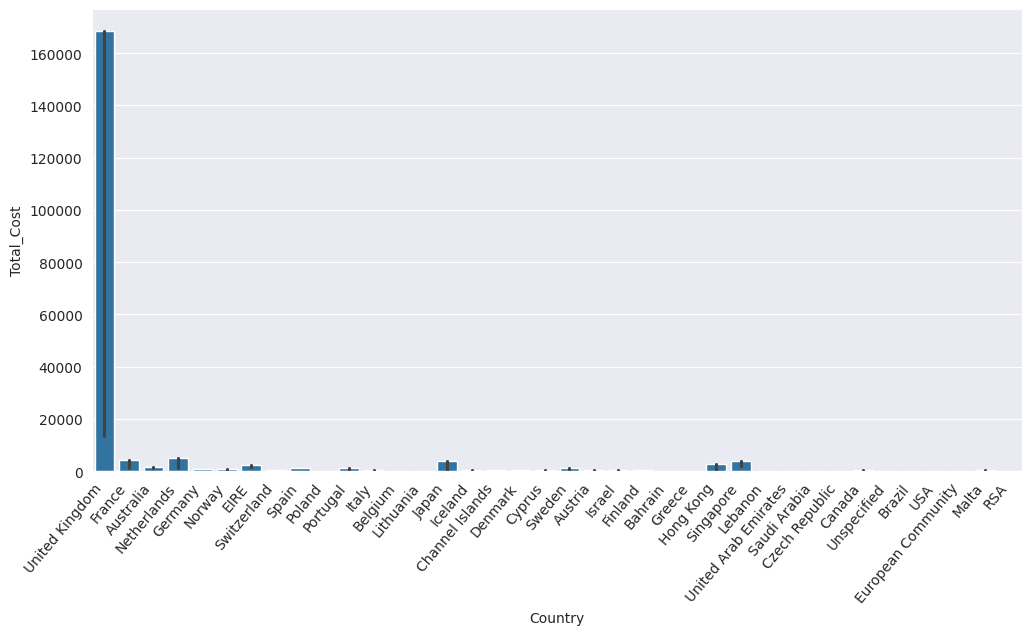

In [34]:
fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
ax1=sns.barplot(x='Country', y='Total_Cost', data=df, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.show()

## Exploring the UK Market

In [35]:
df_uk = df[df['Country']=='United Kingdom']
df_uk.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerID_is_null,NewID,Total_Cost
count,495478.000000,495478,495478.000000,361878.000000,495478.000000,495478.000000,495478.000000
mean,8.605486,2011-07-04 05:01:41.098131456,4.532422,15547.871368,0.269639,264016.667176,16.525065
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,0.000000,123460.000000,-168469.600000
25%,1.000000,2011-03-27 12:06:00,1.250000,14194.000000,0.000000,146390.000000,3.290000
50%,3.000000,2011-07-19 11:47:00,2.100000,15514.000000,0.000000,166390.000000,8.290000
75%,10.000000,2011-10-20 10:41:00,4.130000,16931.000000,1.000000,538566.000000,16.630000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000,1.000000,581498.000000,168469.600000
std,227.588756,NaN,99.315438,1594.402590,0.443772,179302.718367,394.839116


In [36]:
print("Percentage of customers from the UK: ", round(df_uk['NewID'].nunique() * 100 / df['NewID'].nunique(),2),"%" )
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products Bought: ", df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['NewID'].nunique())

Percentage of customers from the UK:  93.88 %
Number of transactions:  23494
Number of products Bought:  4065
Number of customers: 7587


In [37]:
uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
uk_product.head(10)

,StockCode,Description,Quantity
3154,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326
4340,85099B,JUMBO BAG RED RETROSPOT,43167
1237,22197,POPCORN HOLDER,34365
3274,84879,ASSORTED COLOUR BIRD ORNAMENT,33679
4353,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32901
1677,22616,PACK OF 12 LONDON TISSUES,25307
437,21212,PACK OF 72 RETROSPOT CAKE CASES,24702
1216,22178,VICTORIAN GLASS HANGING T-LIGHT,23242
41,17003,BROCADE RING PURSE,22801
11,15036,ASSORTED COLOURS SILK FAN,20322


# 3. RFM Analysis

## Import Libraries

In [39]:
import time
import datetime as dt
from pandas.plotting import scatter_matrix

#Predictive models
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Instead of importing GMM, import GaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

## Preparing the Data

In [40]:
#Check the shape of the data set
df_uk.shape

(495478, 11)

In [41]:
df_uk = df_uk[df_uk['Quantity']>0]
df_uk.shape

(486286, 11)

In [42]:
#remove rows where customerID are NA
df_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
df_uk.shape

(354345, 11)

In [43]:
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products bought: ",df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df_uk['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Number of transactions:  16649
Number of products bought:  3645
Number of customers: 3921
Percentage of customers NA:  0.0 %


##a. Recency: Days since last purchase

In [44]:
df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [45]:
now = dt.date(2011,12,9)

In [46]:
#Create a new column called Date which contains the invoice date without the timestamp
df_uk['Date'] = df_uk['InvoiceDate'].dt.date

In [47]:
#Group by NewID and check the last date of purchase
df_recency = df_uk.groupby(by='CustomerID', as_index=False)['Date'].max()
df_recency.columns = ['CustomerID', 'Last_Purchase_Date']
df_recency.head()

,CustomerID,Last_Purchase_Date
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [48]:
#Calculate the days since last purchase
df_recency['Recency'] = df_recency['Last_Purchase_Date'].apply(lambda x: (now - x).days)
df_recency.head()

,CustomerID,Last_Purchase_Date,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [49]:
#Drop Last_Purchase_Date since we don't need it anymore
df_recency.drop('Last_Purchase_Date', axis=1, inplace=True)

## b. Frequency: Number of purchases

In [50]:
#Make a copy of df_uk and drop duplicates
df_uk_copy = df_uk
df_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)

#Calculate the frequency of purchases
df_frequency = df_uk_copy.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


## c. Monetary: Total amount of money spent

In [51]:
df_monetary = df_uk.groupby(by='CustomerID',as_index=False).agg({'Total_Cost': 'sum'})
df_monetary.columns = ['CustomerID', 'Monetary']
df_monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20


## Create RFM Table

In [52]:
#Merge the recency and frequency dataframes
df_merge = df_recency.merge(df_frequency, on='CustomerID')
df_merge.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,11
2,12748.0,0,210
3,12749.0,3,5
4,12820.0,3,4


In [53]:
#Merge with monetary dataframe
df_rfm = df_merge.merge(df_monetary,on='CustomerID')
df_rfm.set_index('CustomerID',inplace=True)
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


## Customer Segmentation with RFM Model

### RFM Scoring

In [54]:
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,17.7
0.50,50.0,2.0,45.4
0.75,142.0,5.0,124.5


In [55]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 45.4, 0.75: 124.5}}

**Creating the RFM Segmentation Table**

In [56]:
#Arguments (x= value, p = recency, monetary_value, frequency, d = quartiles dict)
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

#Arguments (x= value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [57]:
#Create RFM segmentation table
rfm_segmentation = df_rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(Rscore, args=('Recency',quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMscore, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMscore, args=('Monetary',quantiles))

In [58]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,11,689.49,4,4,4
12748.0,0,210,3841.31,4,4,4
12749.0,3,5,98.35,4,3,3
12820.0,3,4,58.20,4,3,3


In [59]:
rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,11,689.49,4,4,4,444
12748.0,0,210,3841.31,4,4,4,444
12749.0,3,5,98.35,4,3,3,433
12820.0,3,4,58.20,4,3,3,433


In [60]:
rfm_segmentation[rfm_segmentation['RFM_Score']=='444'].head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
12747.0,2,11,689.49,4,4,4,444
12748.0,0,210,3841.31,4,4,4,444
12828.0,2,6,154.80,4,4,4,444
12839.0,2,14,233.91,4,4,4,444
12841.0,4,25,328.74,4,4,4,444
12877.0,3,12,365.79,4,4,4,444
12901.0,8,28,9230.45,4,4,4,444
12919.0,8,6,267.40,4,4,4,444
12921.0,9,37,1014.11,4,4,4,444


In [61]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFM_Score']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFM_Score']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='111']))

Best Customers:  370
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  65
Lost Customers:  11
Lost Cheap Customers:  377


## Applying K-Means Clustering on RFM Variables

In [62]:
rfm_data = df_rfm.drop(['R_Quartile','F_Quartile','M_Quartile','RFM_Score'],axis=1)
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,210,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


### Feature Correlations

In [63]:
rfm_data.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.273779,-0.030123
Frequency,-0.273779,1.000000,0.163225
Monetary,-0.030123,0.163225,1.000000


<Axes: >

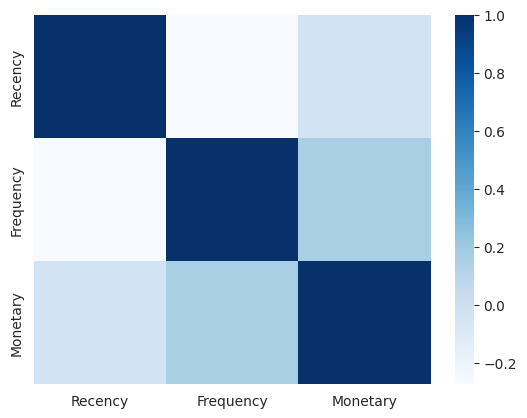

In [64]:
sns.heatmap(rfm_data.corr(),cmap="Blues")

### Visualizing Feature Distributions

array([[<Axes: xlabel='Recency', ylabel='Recency'>,
        <Axes: xlabel='Frequency', ylabel='Recency'>,
        <Axes: xlabel='Monetary', ylabel='Recency'>],
       [<Axes: xlabel='Recency', ylabel='Frequency'>,
        <Axes: xlabel='Frequency', ylabel='Frequency'>,
        <Axes: xlabel='Monetary', ylabel='Frequency'>],
       [<Axes: xlabel='Recency', ylabel='Monetary'>,
        <Axes: xlabel='Frequency', ylabel='Monetary'>,
        <Axes: xlabel='Monetary', ylabel='Monetary'>]], dtype=object)

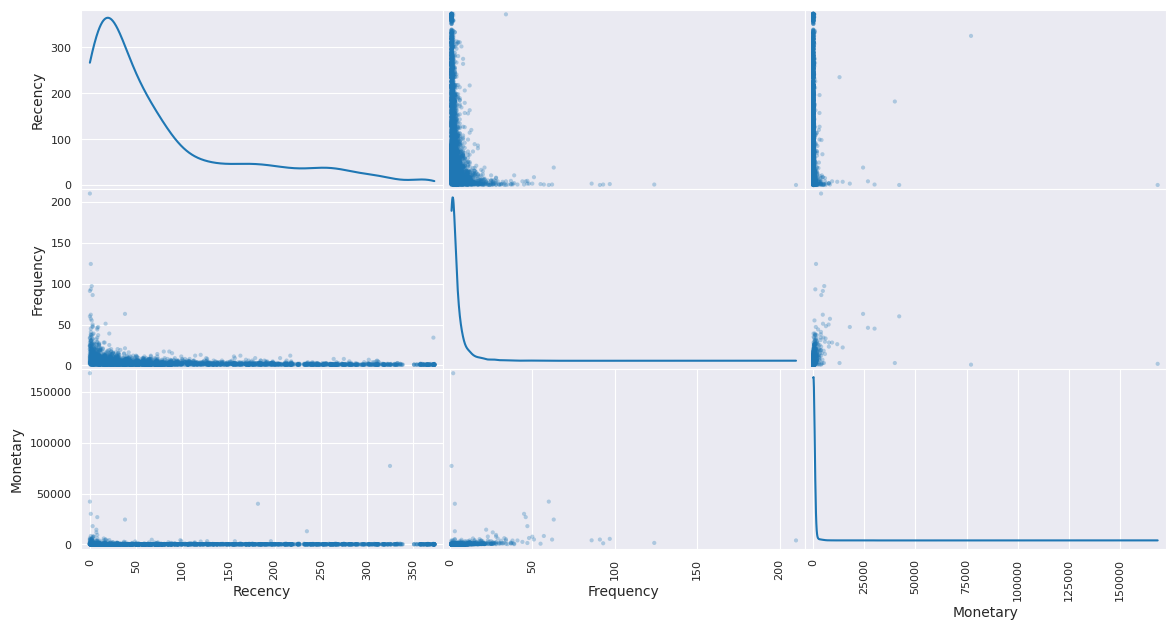

In [65]:
scatter_matrix(rfm_data, alpha = 0.3, figsize = (14,7), diagonal = 'kde')

### Data Normalization

In [66]:
rfm_r_log = np.log(rfm_data['Recency']+0.1) #log(0) is undefined
rfm_f_log = np.log(rfm_data['Frequency'])
rfm_m_log = np.log(rfm_data['Monetary']+0.1)

In [67]:
log_data = pd.DataFrame({'Monetary': rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

In [68]:
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12747.0,6.536097,0.741937,2.397895
12748.0,8.253595,-2.302585,5.347108
12749.0,4.589549,1.131402,1.609438
12820.0,4.065602,1.131402,1.386294


array([[<Axes: xlabel='Monetary', ylabel='Monetary'>,
        <Axes: xlabel='Recency', ylabel='Monetary'>,
        <Axes: xlabel='Frequency', ylabel='Monetary'>],
       [<Axes: xlabel='Monetary', ylabel='Recency'>,
        <Axes: xlabel='Recency', ylabel='Recency'>,
        <Axes: xlabel='Frequency', ylabel='Recency'>],
       [<Axes: xlabel='Monetary', ylabel='Frequency'>,
        <Axes: xlabel='Recency', ylabel='Frequency'>,
        <Axes: xlabel='Frequency', ylabel='Frequency'>]], dtype=object)

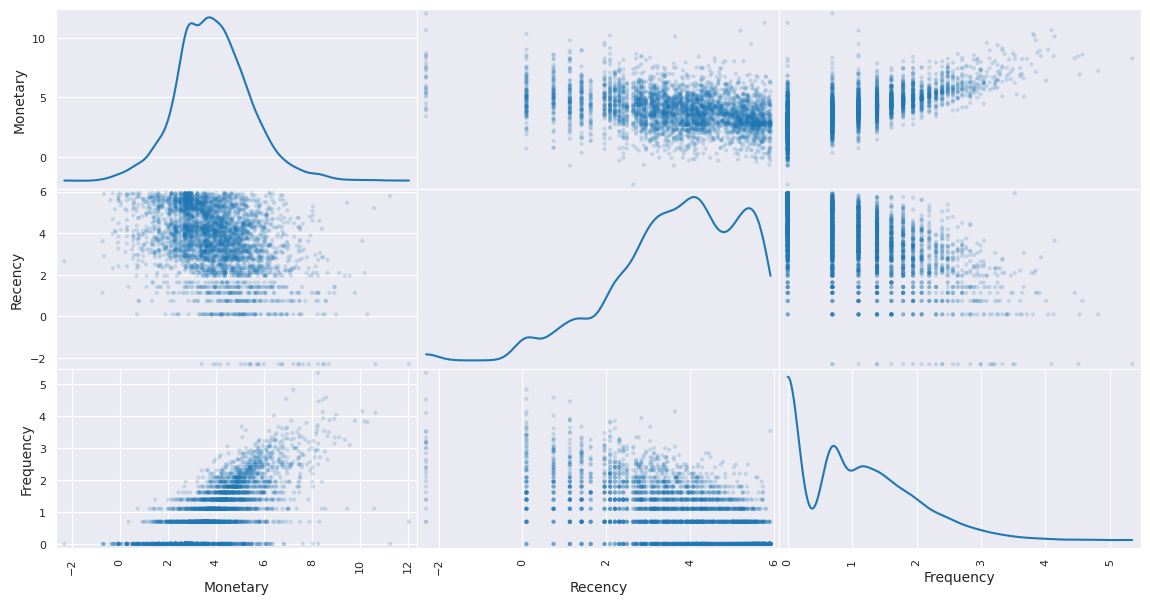

In [69]:
scatter_matrix(log_data, alpha = 0.2, figsize = (14,7), diagonal = 'kde')

<Axes: >

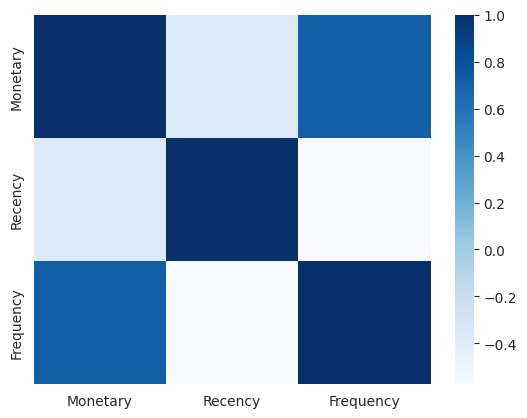

In [70]:
sns.heatmap(log_data.corr(),cmap="Blues")

In [71]:
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.368472,0.716935
Recency,-0.368472,1.000000,-0.573982
Frequency,0.716935,-0.573982,1.000000


In [73]:
# Instead of using as_matrix(), use to_numpy() to convert the DataFrame to a NumPy array.
matrix = log_data.to_numpy()
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.38928248344330485
For n_clusters = 3 The average silhouette_score is : 0.3019792001270853
For n_clusters = 4 The average silhouette_score is : 0.3121009100971234
For n_clusters = 5 The average silhouette_score is : 0.2917014638556248
For n_clusters = 6 The average silhouette_score is : 0.2971152471372098
For n_clusters = 7 The average silhouette_score is : 0.2940320824507468
For n_clusters = 8 The average silhouette_score is : 0.28776046917443143
For n_clusters = 9 The average silhouette_score is : 0.2907522460095892


In [74]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.389


### Visualize the Clusters

Text(0, 0.5, 'Monetary')

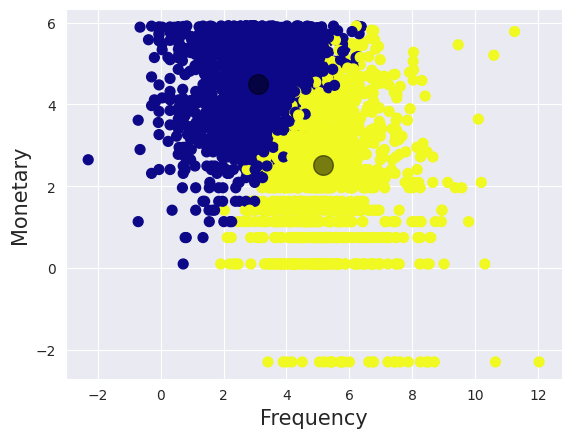

In [75]:
#create a scatter plot
plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='plasma')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)

In [76]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T

""
Number Customers
